# Recap - Natural Language Processing

In this recap we will review an attempt at a task set from a Data Science interview at a Law Firm. This exercise was posed as follows:

<div style="text-align: center;">
    <b>
        Data Science/Engineering Interview
        
<div style="text-align: center;">
        Practical Exercise
    </b>
</div>

Download the plain text version of Alice’s Adventures in Wonderland by Lewis Carroll from Project Gutenberg: http://www.gutenberg.org/files/11/11-0.txt. Assume that the text of the book runs from the line that says “CHAPTER I. Down the Rabbit-Hole” to the line that says “THE END” at the end of chapter 12 (inclusive). 

1.	Produce a table (in a CSV file or in Microsoft Excel) showing how many times each word appears in each chapter. These may be lemmatized.

2.	Produce any interesting or relevant analysis as you see fit on the topics represented by each chapter. 

3.	Produce any interesting or relevant data visualizations about the analysis from task 1 and 2. 

Please send us the table you produce, and the code you used to produce it.


## What options do we have to complete this task?

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log, ceil
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

!pip install wordcloud
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
import string

[nltk_data] Downloading package stopwords to /home/peter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/peter/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/peter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# The below updates may be needed to run the wordcloud (it may break regardless)
# !pip install --upgrade pip
# !pip install --upgrade Pillow

# I have chosen to use Term Frequency Inverse Document Frequency (TFIDF)


TF-IDF, a text analysis technique, assigns weights to words which increases based on their frequency in a document and decreases based on their frequency across a collection. It can be used to model the topics of each chapter in a novel by highlighting significant terms and distinguishing their importance in the narrative.

- Information Retrieval

- Keyword Extraction

- Document Similarity

- Text Summarization

- Topic Modeling

- Sentiment Analysis

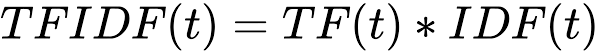

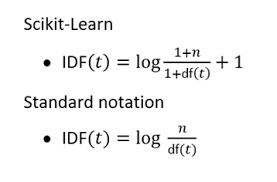

# Importing the data

In [32]:
# Downloading the book from Project Gutenberg and looking at the raw text

!curl -o alice_in_wonderland.txt 'https://www.gutenberg.org/files/11/11-0.txt'
pwd = !pwd
path = pwd[0] + '/alice_in_wonderland.txt'
f = open(path, "r", newline = None)
text = ' '.join(f.read().splitlines())
text

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  170k  100  170k    0     0   189k      0 --:--:-- --:--:-- --:--:--  189k


'\ufeffThe Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: Alice’s Adventures in Wonderland  Author: Lewis Carroll  Release Date: January, 1991 [eBook #11] [Most recently updated: October 12, 2020]  Language: English  Character set encoding: UTF-8  Produced by: Arthur DiBianca and David Widger  *** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***  [Illustration]     Alice’s Adventures in Wonderland  by Lewis Carroll  THE MILLENNIUM FULCRUM EDITION 3.0  Contents   CHAPTER I.     Down the R

# Removing unnecessary text that's not in the novel

In [33]:
# Slice the text before and after the novel finishes, starting and ending with the below strings:

start = 'CHAPTER I. Down the Rabbit-Hole'
end = 'THE END'

start_index = text.find(start)
end_index = text.find(end)
novel = text[start_index:end_index]
novel

'CHAPTER I. Down the Rabbit-Hole   Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”  So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.  There was nothing so _very_ remarkable in that; nor did Alice think it so _very_ much out of the way to hear the Rabbit say to itself, “Oh dear! Oh dear! I shall be late!” (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually _took a watch out of its 

# Splitting the text by chapter

In [40]:
# Each chapter begins with the string 'CHAPTER', and there are no occurances of this in the rest of the text.
# Split the text into chapters and then split these chapters into sentences



chapter_list = novel.split('CHAPTER')[1:]
len(chapter_list)

12

# Building a pre-processor

We are building a pre-processing pipeline for our CountVectorizer. 

The steps we need to follow are:

- Remove all punctuation 

- Lemmatize our words using WordNetLemmatizer()

- Make the chapters lowercase


In [41]:
def preprocessing(chapter):
    
# Removing punctuation    
    punc_list = string.punctuation
    
    result = ''
    for letter in chapter:
        if letter not in punc_list:
            result += letter
    
# Lemmatising and lowercase
    wnl = WordNetLemmatizer()
    result = ' '.join(wnl.lemmatize(word, pos = 'v').lower() for word in result.split()) 
    result = ' '.join(wnl.lemmatize(word, pos = 'n').lower() for word in result.split()) 
    
    return result 

# Counting the terms per chapter

We are now counting the terms per chapter using the CountVectorizer() we have imported from sklearn, including both:

- Our pre-processing function 
- Stop words in English 

We need this outputted in a Dataframe, with the correct feature names assigned.

In [44]:
vectorizer = CountVectorizer(preprocessor = preprocessing, stop_words = 'english')
X = vectorizer.fit_transform(chapter_list)
features = vectorizer.get_feature_names_out()
count_df = pd.DataFrame(X.toarray(), columns = features)
count_df

/home/peter/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'make'] not in stop_words.
  warnings.warn(


,abide,able,absence,absurd,acceptance,accident,accidentally,account,accusation,accustom,...,year,yell,yelp,yer,yes,yesterday,young,youth,zealand,zigzag
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,4,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,0,1
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,2,0,0,0,3,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,2,1,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,3,0,2,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,2,1,0,0,0,0


# Applying the Tfidf formula

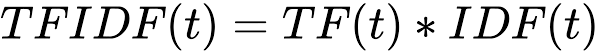

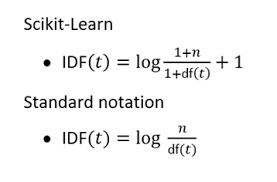

Here we are applying the 'traditional' Tfidf formula ourselves, having worked out the count already (as instructed).

We need **apply** the idf to each column, to turn it into the Tfidf. We need the following information per feature:

1) Count the number of documents containing the term: df(t)

2) Count the number of documents: n

In [47]:
def calculate_tfidf(column):
    
    non_zero_count = column[column !=0].count()
    
    doc_num =len(column)
    
    idf = log(doc_num / non_zero_count)
    
    return column * idf if non_zero_count !=0 else column

result_df = count_df.apply(calculate_tfidf)
result_df

,abide,able,absence,absurd,acceptance,accident,accidentally,account,accusation,accustom,...,year,yell,yelp,yer,yes,yesterday,young,youth,zealand,zigzag
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.538997,0.000000,0.000000,0.00000,2.484907,0.000000
1,0.000000,2.484907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,1.791759,2.484907,0.000000,0.000000,0.000000,0.000000,2.484907,...,0.000000,0.000000,0.000000,0.000000,0.538997,0.000000,1.098612,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.484907,9.939627,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,14.90944,0.000000,2.484907
5,2.484907,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,...,3.583519,0.000000,0.000000,0.000000,1.616990,0.000000,1.098612,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.077993,1.386294,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,2.484907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.616990,0.000000,2.197225,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,...,0.000000,2.484907,0.000000,0.000000,1.077993,1.386294,0.000000,0.00000,0.000000,0.000000


# Analysis of the highest scoring TFIDF words in each chapter

We are analysing the top 10 Tfidf terms per chapter to see if we can see a correlation with the themes in the chapter.

**Remember we can do apply functions to both columns and rows!**

In [51]:
def top_10_features(row):
    
    feature_names = row.index.tolist()
    
    top_10_features = sorted(feature_names, key=lambda x: row[x], reverse=True)[:10]
    
    return top_10_features

result_top_df = result_df.apply(top_10_features, axis = 1)
result_top_df

0     [bat, eat, key, candle, dark, poison, bottle, ...
1     [mouse, pool, mabel, fan, swim, glove, capital...
2     [dodo, mouse, lory, prizes, thimble, caucusrac...
3     [window, puppy, fan, bottle, chimney, glove, a...
4     [caterpillar, pigeon, serpent, youth, egg, fat...
5     [footman, baby, cat, mad, pig, wow, grin, grun...
6     [dormouse, hatter, hare, march, twinkle, clock...
7     [queen, hedgehog, gardener, king, executioner,...
8     [turtle, mock, moral, gryphon, duchess, queen,...
9     [turtle, mock, dance, gryphon, lobster, oop, s...
10    [hatter, king, court, witness, dormouse, offic...
11    [king, dream, jury, sister, unimportant, jurym...
dtype: object

We'll perform a quick inspection of the terms to see if there is correlation to the story lines

In [56]:
result_top_df[4]

['caterpillar',
 'pigeon',
 'serpent',
 'youth',
 'egg',
 'father',
 'size',
 'hookah',
 'green',
 'jaw']

# Displaying top scoring TFIDF words in a wordcloud

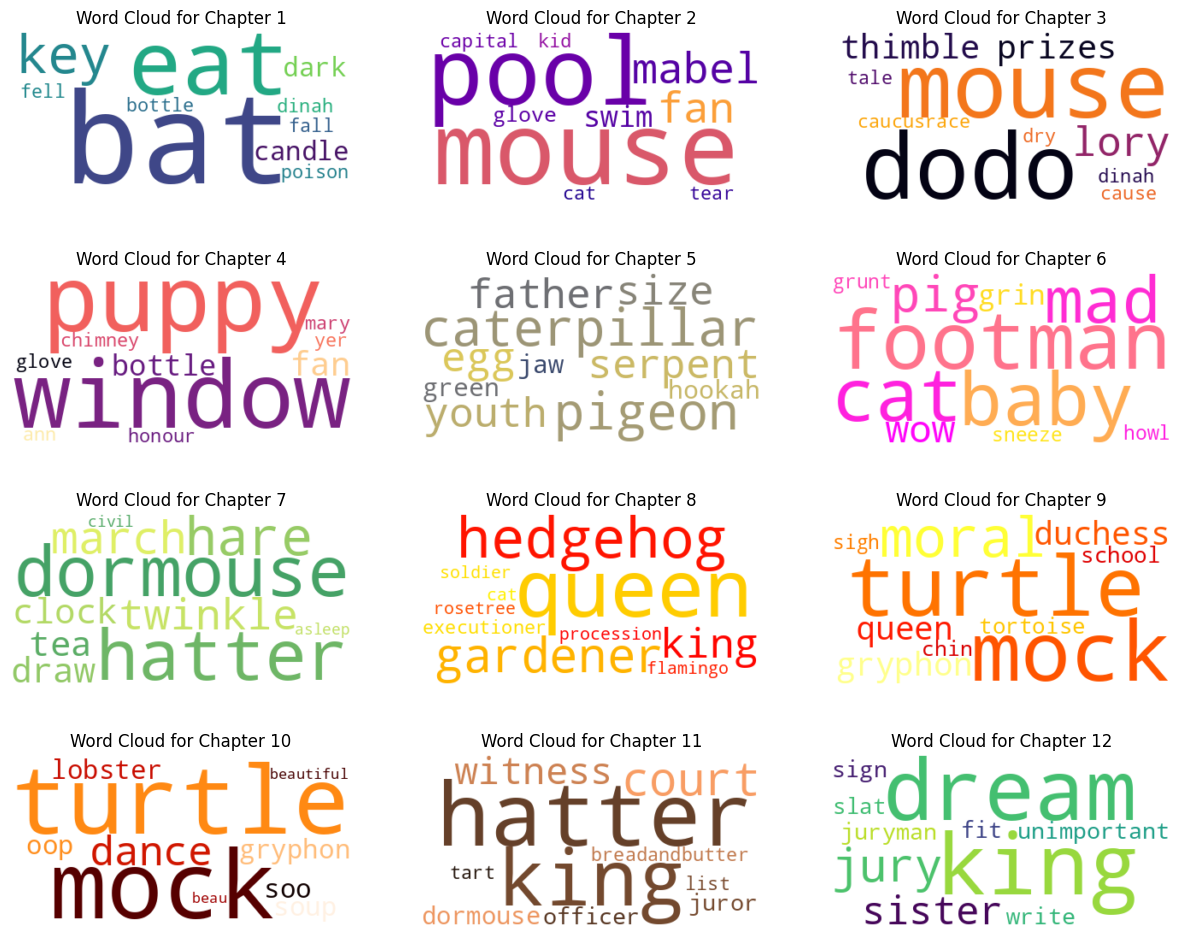

In [57]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'spring',
             'summer', 'autumn', 'hot', 'gist_heat', 'copper','viridis']

for i, ax in enumerate(axes.flat):
    doc_num = len(chapter_list)
    if i < doc_num:  
        text = ' '.join(result_top_df[i])
        wc = WordCloud(prefer_horizontal = 1, background_color="white", collocations=False, colormap = colormaps[i])
        wc.generate(text)
        ax.imshow(wc, interpolation='bilinear')
        ax.set_title(f"Word Cloud for Chapter {i+1}")
        ax.axis("off")

plt.show()

# Forming it all into a pipeline!

In [58]:
def tfidf_pipeline(file_name, start, end, chapter_split, top_n = 10):

    pwd = !pwd
    path = pwd[0] + f'/../data/{file_name}'
    f = open(path, "r", newline = None)
    text = ' '.join(f.read().splitlines())

    start_ind = text.find(start)
    end_ind = text.find(end)
    novel = text[start_ind:end_ind+len(end)]

    split_text = novel.split(chapter_split)
    chapter_list = []
    
    for chapter_text in split_text:
        if chapter_text.strip():
            chapter_list.append(f'{chapter_split}' + chapter_text)
    doc_num = len(chapter_list)
    def preprocessing(chapter):

    #Removing punctuation    
        punc_list = string.punctuation

        result = ''   
        for letter in chapter:
            if letter not in punc_list:
                result+= letter 

    #Lemmatising and lowercase
        wnl = WordNetLemmatizer()
        result = ' '.join(wnl.lemmatize(word, pos = 'v').lower() for word in result.split()) 
        result = ' '.join(wnl.lemmatize(word, pos = 'n').lower() for word in result.split()) 
        return result

    vectorizer = CountVectorizer(preprocessor = preprocessing, stop_words = 'english')
    X = vectorizer.fit_transform(chapter_list)
    features = vectorizer.get_feature_names_out()
    count_df = pd.DataFrame(X.toarray(), columns = features)

    def calculate_tfidf(column):
        non_zero_count = column[column != 0].count()
        doc_num = len(column)
        idf = log(doc_num / non_zero_count)

        return column * idf if non_zero_count != 0 else column

    result_df = count_df.apply(calculate_tfidf)

    def top_n_features(row):
        feature_names = row.index.tolist()
        top_n_features = sorted(feature_names, key=lambda x: row[x], reverse=True)[:top_n]
        return top_n_features

    result_top_df = result_df.apply(top_n_features, axis=1)
    
    n_cols = 3
    n_rows = ceil(doc_num/n_cols)
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 15))

    colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'spring',
                 'summer', 'autumn', 'hot', 'gist_heat', 'copper','viridis',
                 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'spring',
                 'summer', 'autumn', 'hot', 'gist_heat', 'copper','viridis']

    for i, ax in enumerate(axes.flat):
        if i < doc_num:  
            text = ' '.join(result_top_df[i])
            wc = WordCloud(margin = 3, prefer_horizontal = 1, background_color="white", collocations=False, colormap = colormaps[i])
            wc.generate(text)
            ax.imshow(wc, interpolation='bilinear')
            ax.set_title(f"Word Cloud for {chapter_split} {i+1}")
            ax.axis("off")

    plt.show()
    return

# Using the TFIDF pipeline - guess the book!

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  231k  100  231k    0     0   234k      0 --:--:-- --:--:-- --:--:--  234k


/home/peter/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'make'] not in stop_words.
  warnings.warn(


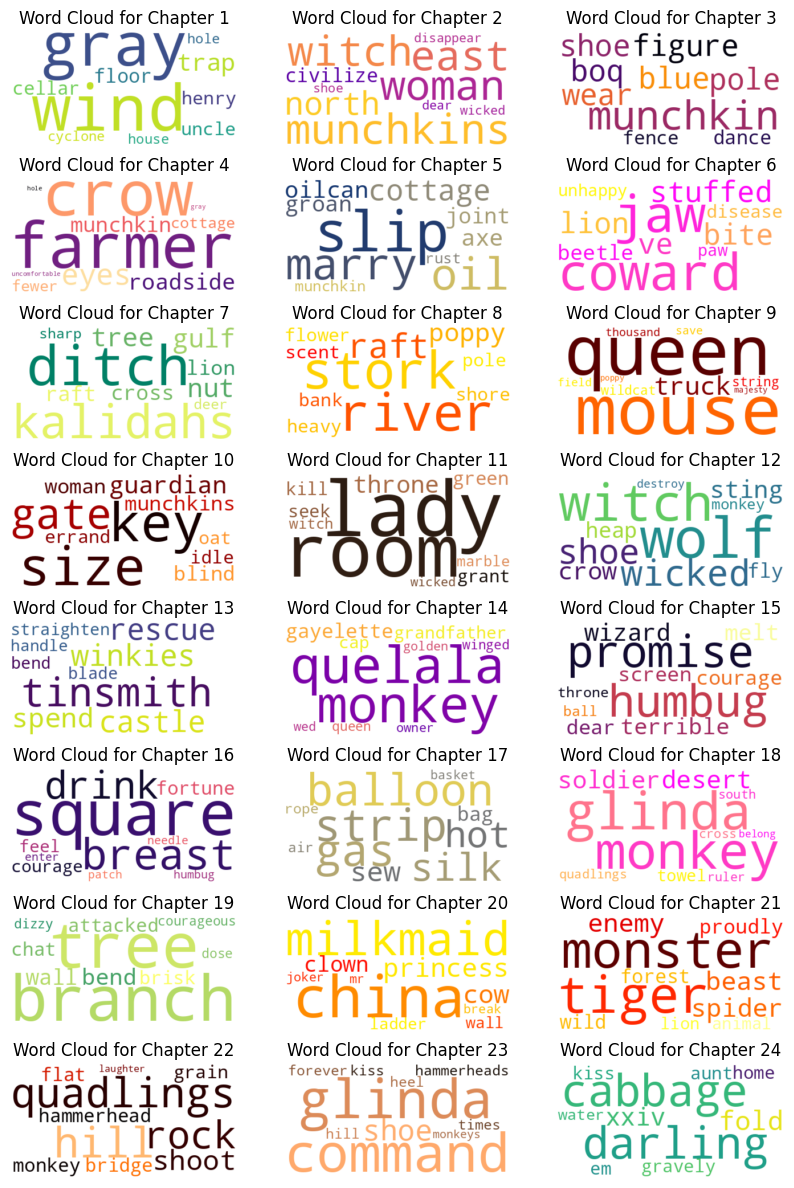

In [59]:
!curl -o ../data/mystery_book_1.txt 'https://www.gutenberg.org/cache/epub/55/pg55.txt'

file_name = 'mystery_book_1.txt'

chapter_split = 'Chapter'

start = 'Chapter I The Cyclone'
end = 'to be at home again!”'

tfidf_pipeline(file_name, start, end, chapter_split, 10)

/home/peter/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'make'] not in stop_words.
  warnings.warn(


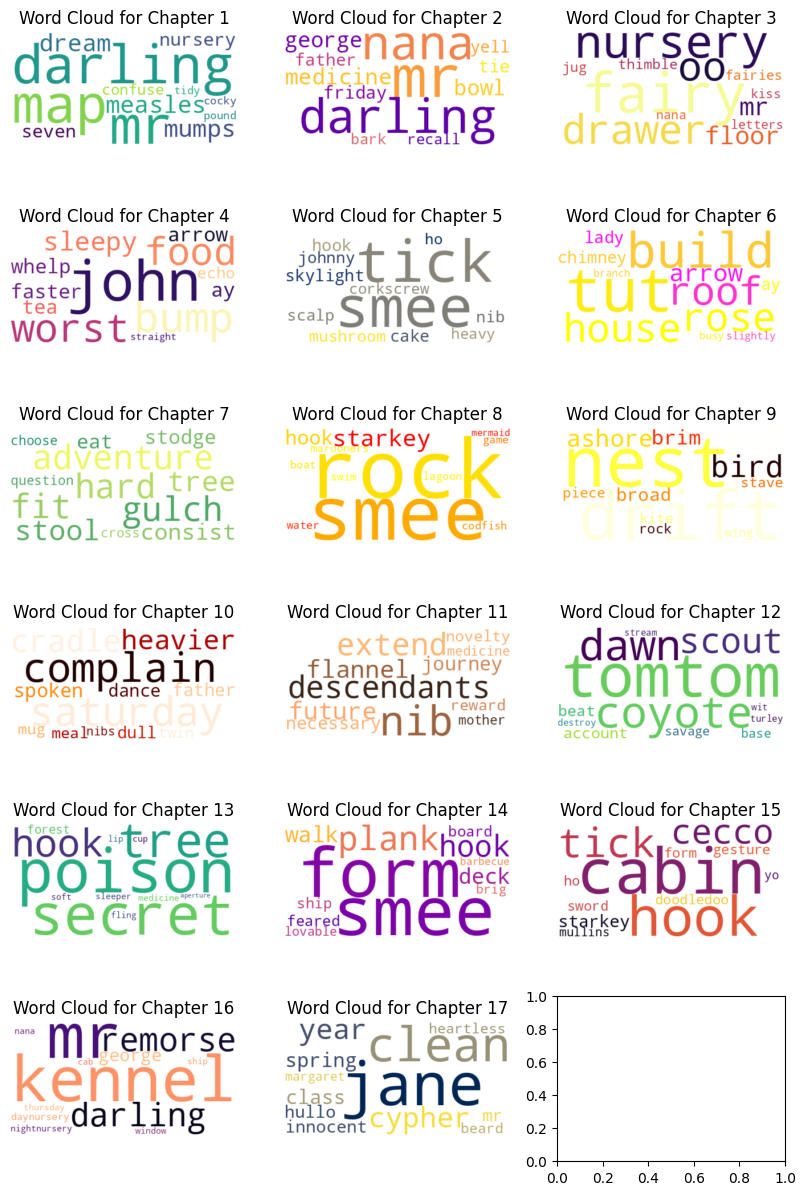

In [60]:
!curl -o ../data/mystery_book_2.txt 'https://www.gutenberg.org/cache/epub/16/pg16.txt'

file_name = 'mystery_book_2.txt'

chapter_split = 'Chapter'

start = 'All children, except one'
end = 'THE END'

tfidf_pipeline(file_name, start, end, chapter_split, 12)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  701k  100  701k    0     0   655k      0  0:00:01  0:00:01 --:--:--  656k


/home/peter/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'make'] not in stop_words.
  warnings.warn(


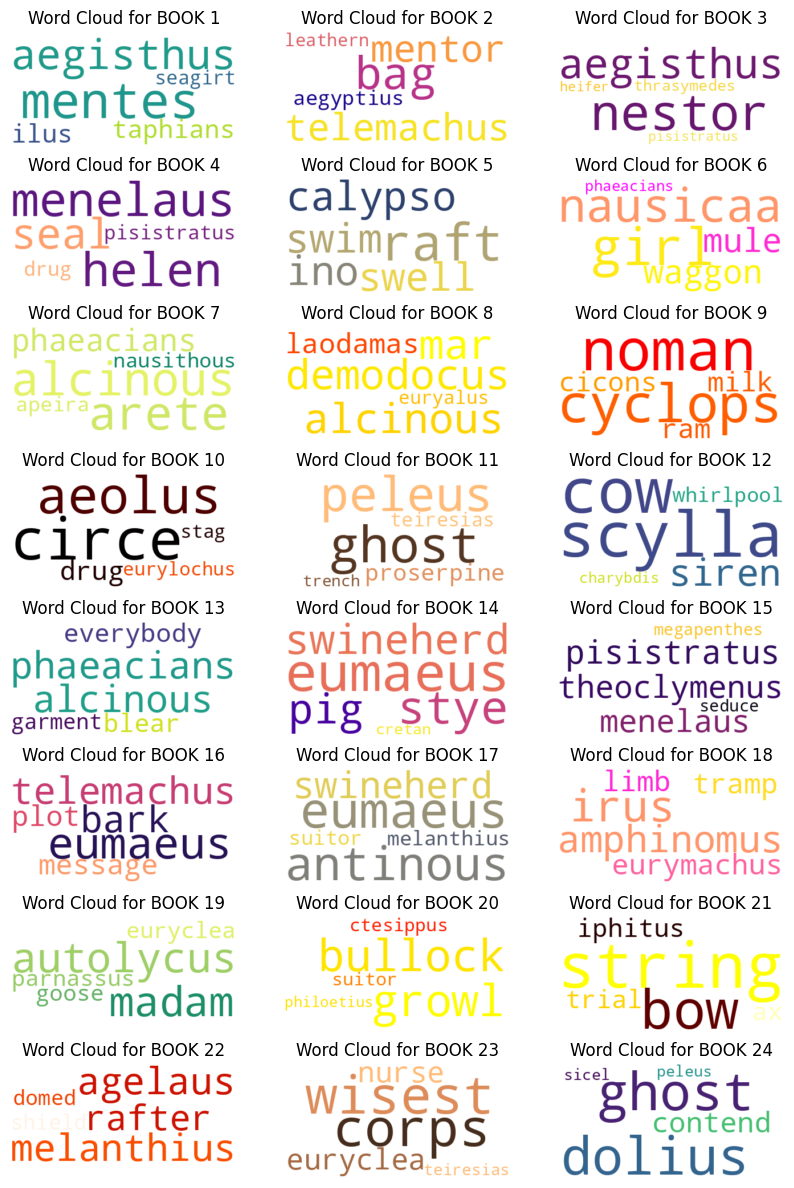

In [61]:
!curl -o ../data/mystery_book_3.txt 'https://www.gutenberg.org/cache/epub/1727/pg1727.txt'

file_name = 'mystery_book_3.txt'

chapter_split = 'BOOK'

start = "THE GODS IN COUNCIL—MINERVA’S VISIT TO ITHACA—THE CHALLENGE FROM TELEMACHUS TO THE SUITORS."
end = 'between the two contending parties.'

tfidf_pipeline(file_name, start, end, chapter_split, 5)